<a href="https://colab.research.google.com/github/Lariiuki/Pos-Deep-Learning/blob/main/Atividade_Matematica_para_Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Matemática para Deeplearning - Make Moons

Grupo: Larissa Akemi Iuki, Marcos Vinicuis Suguino, Ana Vitória da Silva Santos, Luan Fernandes de França, Vinicius da Silva Ferreira Lima

### Explicação do Projeto 🔎

**Objetivo:** O trabalho consiste em projetar e implementar uma rede neural artificial a partir do exemplo exemplo4.py.
Foram feitas modificações na arquitetura, nas funções de ativação e na base de dados para observar como esses fatores influenciam o desempenho do modelo. No notebook, foi realizado um experimento de classificação utilizando redes neurais para separar dados não linearmente separáveis, gerados pela função make_circles do scikit-learn.

### Código exemplo

Código original (exemplo4.py) utilizava o dataset 'make_moons', implementava uma rede neural manual com 1 camada escondida com 2 neurônios, com função de ativação **Sigmoide** e algoritmo de retropropagação + gradiente descendente. Também implementava uma versão em Keras, como comparação.

### Código modificado

Na rede manual (implementada com Numpy), a camada escondida foi definida com 2 neurônios, utilizando a função de **ativação sigmoid**. O treinamento foi feito por gradiente descendente, ajustando os pesos para minimizar a função de perda escolhida (no código, a binary cross-entropy).

A acurácia foi avaliada antes e depois do treinamento, mostrando **evolução de cerca de 50% para ~88%**, indicando que a rede aprendeu a separar melhor as classes do dataset.

No cálculo manual do backpropagation, os gradientes são obtidos explicitamente: o gradiente da camada de saída é propagado para os pesos da camada escondida e os vieses, utilizando as derivadas da função sigmoid. Isso permite atualizar todos os pesos e vieses da rede em cada iteração do gradiente descendente.

Na rede com Keras, definimos uma arquitetura sequencial com duas camadas escondidas de 5 neurônios, sendo a primeira com função de **ativação ReLU** e a segunda com **tanh**, além da camada de saída com **ativação sigmoid**. O treinamento foi realizado com o otimizador SGD (learning rate = 0.1), também minimizando o MSE. Após 100 épocas, o **modelo alcançou uma acurácia em torno de 86%**.

Essas modificações na arquitetura e nas funções de ativação tiveram impacto positivo no desempenho do modelo, permitindo que ele representasse relações não lineares do dataset e obtivesse resultados significativamente melhores em relação à inicialização aleatória.

⚠️ **Observação:** Apesar do código da rede manual usar **binary cross-entropy**, no contexto em que a saída da rede é limitada a 0 ou 1, também poderia ser utilizada a função MSE para medir o erro, já que a saída não representa probabilidades contínuas como o esperado para BCE.

Importando as bibliotecas

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import initializers


Gerar o conjunto da dados do exemplo make moons

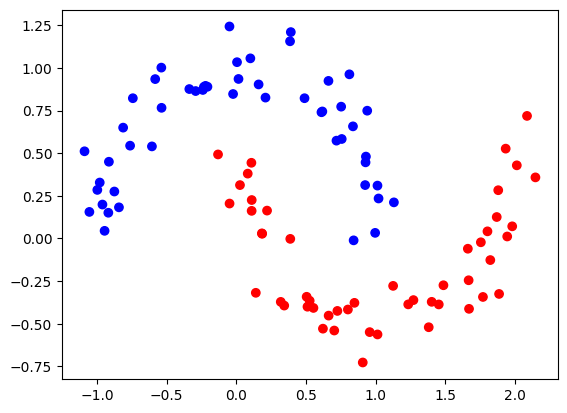

In [ ]:
X, Y = datasets.make_moons(100, noise=0.1)

color = ['blue' if k == 0 else 'red' for k in Y]

plt.scatter(X[:, 0], X[:, 1], c=color)
plt.savefig('duas_luas.svg')

Funções de ativação

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


Roda a rede neural (classificação binária), faz as predições

In [ ]:
def run_neural_net(x, w0, b0, b1, w1):
    s00 = w0[0, 0] * x[0]
    s01 = w0[0, 1] * x[1]
    s02 = s00 + s01
    v0 = s02 + b0[0]
    y0 = sigmoid(v0)

    s10 = w0[1, 0] * x[0]
    s11 = w0[1, 1] * x[1]
    s12 = s10 + s11
    v1 = s12 + b0[1]
    y1 = sigmoid(v1)

    s20 = y0 * w1[0]
    s21 = y1 * w1[1]
    s22 = s20 + s21
    v2 = s22 + b1[0]
    y2 = sigmoid(v2)
    return 1 if y2 > 0.5 else 0


Backpropagation

In [ ]:
def neural_net(x, d, w0, b0, b1, w1):
    # forward

    s00 = w0[0, 0] * x[0]
    s01 = w0[0, 1] * x[1]
    s02 = s00 + s01
    v0 = s02 + b0[0]
    y0 = sigmoid(v0)

    s10 = w0[1, 0] * x[0]
    s11 = w0[1, 1] * x[1]
    s12 = s10 + s11
    v1 = s12 + b0[1]
    y1 = sigmoid(v1)

    s20 = y0 * w1[0]
    s21 = y1 * w1[1]
    s22 = s20 + s21
    v2 = s22 + b1[0]
    y2 = sigmoid(v2)
    #e = y2 - d
    #L = 1/2 * (e ** 2)

    L = -((d*np.log(y2)) + ((1-d)*np.log(1-y2)))


    # backward
    grad_w0 = np.zeros(w0.shape)
    grad_w1 = np.zeros(w1.shape)
    grad_b0 = np.zeros(b0.shape)
    grad_b1 = np.zeros(b1.shape)

    # grad_L = 1
    # grad_e = grad_L * e
    # grad_y2 = grad_e

    grad_y2 = (y2-d)/(y2*(1-y2))
    grad_v2 = grad_y2 * y2 * (1 - y2)
    grad_b1[0] = grad_v2
    grad_s22 = grad_v2
    grad_s21 = grad_s22
    grad_s20 = grad_s22
    grad_w1[1] = grad_s21 * y1
    grad_y1 = grad_s21 * w1[1]

    grad_w1[0] = grad_s20 * y0
    grad_y0 = grad_v2 * w1[0]

    grad_v0 = grad_y0 * y0 * (1 - y0)
    grad_v1 = grad_y1 * y1 * (1 - y1)

    grad_b0[0] = grad_v0
    grad_b0[1] = grad_v1
    grad_s12 = grad_v1
    grad_s02 = grad_v0

    grad_s00 = grad_s02
    grad_s01 = grad_s02
    grad_s10 = grad_s12
    grad_s11 = grad_s12
    grad_w0[0, 0] = grad_s00 * x[0]
    grad_w0[0, 1] = grad_s01 * x[1]
    grad_w0[1, 0] = grad_s10 * x[0]
    grad_w0[1, 1] = grad_s11 * x[1]
    return grad_w0, grad_b0, grad_w1, grad_b1, L


Código principal

In [ ]:
def main():
    # inicialização aleatória
    w0 = np.random.rand(2, 2)
    w1 = np.random.rand(2)
    b0 = np.random.rand(2)
    b1 = np.random.rand(1)

    # taxa de aprendizado
    taxa = 0.1

    acc = 0
    for i in range(100):
        out = run_neural_net(X[i],  w0, b0, b1, w1)
        if out == Y[i]:
            acc += 1
    print(acc, "acurácia antes do treinamento")

    # gradiente descendente
    for i in range(10000):
        loss = 0

        grad_w0 = np.zeros(w0.shape)
        grad_w1 = np.zeros(w1.shape)
        grad_b0 = np.zeros(b0.shape)
        grad_b1 = np.zeros(b1.shape)

        for k in range(100):
            g_w0, g_b0, g_w1, g_b1, L = neural_net(X[k], Y[k], w0, b0, b1, w1)

            grad_w0 += g_w0
            grad_w1 += g_w1
            grad_b0 += g_b0
            grad_b1 += g_b1
            loss += L

        w0 -= taxa * grad_w0
        w1 -= taxa * grad_w1
        b0 -= taxa * grad_b0
        b1 -= taxa * grad_b1

        if i % 1000 == 0:
            print(i, loss)

    # acurácia após o treinamento
    acc = 0
    for i in range(100):
        out = run_neural_net(X[i],  w0, b0, b1, w1)
        if out == Y[i]:
            acc += 1
    print('acc', acc)

    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu'))
    model.add(Dense(5, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(learning_rate=taxa)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
    #    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.fit(X, Y, epochs=100, verbose=False, batch_size=5)

    acc = model.evaluate(X, Y)


main()

50 acurácia antes do treinamento
0 86.98195502248583
1000 22.218542019313663
2000 21.952685240352558
3000 21.829776366258663
4000 21.752270708402982
5000 21.696918903654886
6000 21.654569410932506
7000 21.620710892433504
8000 21.59280189350841
9000 21.569276230837783
acc 88
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8635 - loss: 0.0829  
